In [3]:
%run lib.py

In [1]:
def ExpTruncatedCDF(x, alpha): 
    return (1 - exp(-alpha * x)) / (1 - exp(-alpha))

def ExpTruncatedPDF(x, alpha): 
    return alpha * exp(-alpha * x) / (1 - exp(-alpha))

In [7]:
def PlotBuilderFour(gamma_s, gamma_b, function, parameters_list, linestyles, colors, labels, constant_revenue, figname, legend_hor): 
    fig = plt.figure(figsize = (20, 9))

    gs = gridspec.GridSpec(4, 2, hspace = 0.5, wspace = 0.1, height_ratios=[1.0, 1.0, 0.5, 0.5]) 
    gammas_s = np.arange(gamma_b, 1.0, 0.005)
    gammas_b = np.arange(0.01, gamma_s + 0.0001, 0.005)
    
    Revenues_s = []
    Params_s = []
    for s in gammas_s: 
        solution_dict = function(s, gamma_b)
        Revenues_s.append([solution_dict['revenue'], constant_revenue(s)])
        Params_s.append([solution_dict[param] for param in parameters_list])
    Revenues_s = np.array(Revenues_s).transpose()
    Params_s = np.array(Params_s).transpose()
    
    Revenues_b = []
    Params_b = []
    for b in gammas_b: 
        solution_dict = function(gamma_s, b)
        Revenues_b.append([solution_dict['revenue'], constant_revenue(gamma_s)])
        Params_b.append([solution_dict[param] for param in parameters_list])
    Revenues_b = np.array(Revenues_b).transpose()
    Params_b = np.array(Params_b).transpose()
    
    ax1 = plt.Subplot(fig, gs[0:2, 1])
    for (row, param, style, color, label) in zip(Params_s, parameters_list, linestyles, colors, labels): 
        line, = ax1.plot(gammas_s, row, linestyle = style, color = color, label = label)
        label = param
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.legend(loc = (legend_hor, -0.1), ncol = 7)
    ax1.set_title('(b) gamma_b = 0.2')
    fig.add_subplot(ax1)
    
    ax2 = plt.Subplot(fig, gs[0:2, 0])
    for (row, param, style, color) in zip(Params_b, parameters_list, linestyles, colors): 
        line, = ax2.plot(gammas_b, row, linestyle = style, color = color)
    ax2.set_ylabel('Optimal algorithm prices')
    ax2.set_title('(a) gamma_s = 0.8')
    plt.setp(ax2.get_xticklabels(), visible=False)
    fig.add_subplot(ax2)
    
    ax4 = plt.Subplot(fig, gs[2:4, 1], sharex = ax1)
    line_1, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[0], Revenues_s[1])])
    line_2, = ax4.plot(gammas_s, [1.0 for const in Revenues_s[1]], color = 'gray', linestyle = '--')
    ax4.set_xlabel('gamma_s')
    fig.add_subplot(ax4)
    
    #ax5 = plt.Subplot(fig, gs[2, 1])
    #line_1, = ax5.plot(gammas_b, Revenues_b[0])
    #line_2, = ax5.plot(gammas_b, Revenues_b[1])
    #fig.add_subplot(ax5)
    
    ax6 = plt.Subplot(fig, gs[2:4, 0], sharex = ax2)
    line_1, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[0], Revenues_b[1])], label = 'Optimal')
    line_2, = ax6.plot(gammas_b, [1.0 for const in Revenues_b[1]], label = 'Baseline', color = 'gray', linestyle = '--')
    ax6.legend(loc = (0.6, 0.75))
    ax6.set_ylabel('Relative expected strategic revenue')
    ax6.set_xlabel('gamma_b')
    fig.add_subplot(ax6)

    
    fig.savefig(figname, bbox_inches = 'tight', format='eps')
    plt.show()   

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Figure C.1 from Appendix

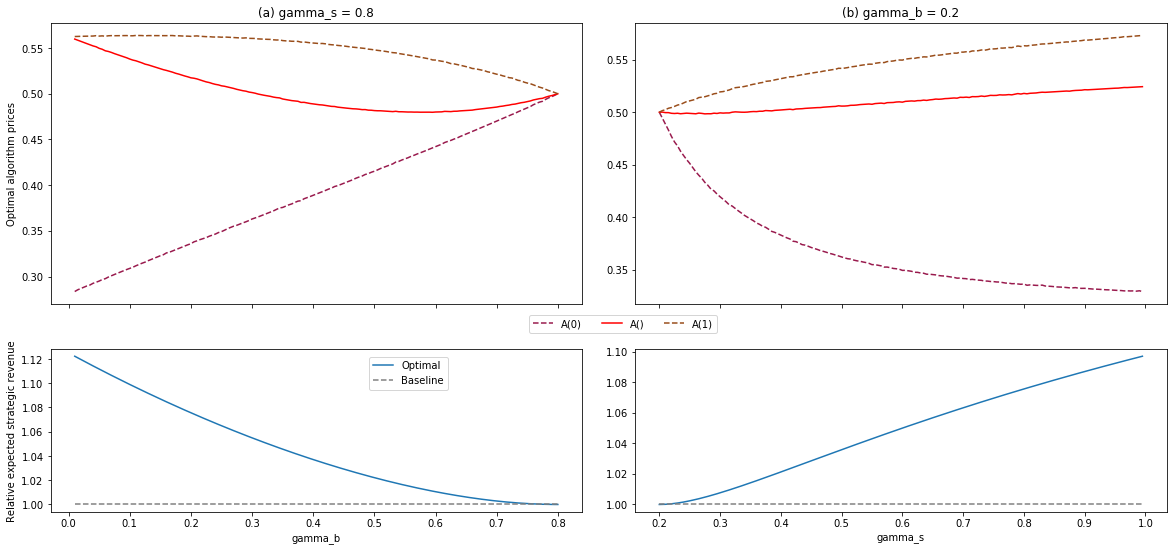

In [11]:
solution = lambda s, b : GlobalSolver(2, lambda x : x, lambda x : 1.0, s, b, False)
constant_revenue_2 = lambda s : (1 + s) * 0.25
parameters_list = ['p_0', 'p_', 'p_1']
labels = ['A(0)', 'A()', 'A(1)']
linestyles = ['--', '-', '--']
colors = [(0.6, 0.1, 0.3), 'red', (0.6, 0.3, 0.1)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_2, 'T2Uniform.eps', -0.2)

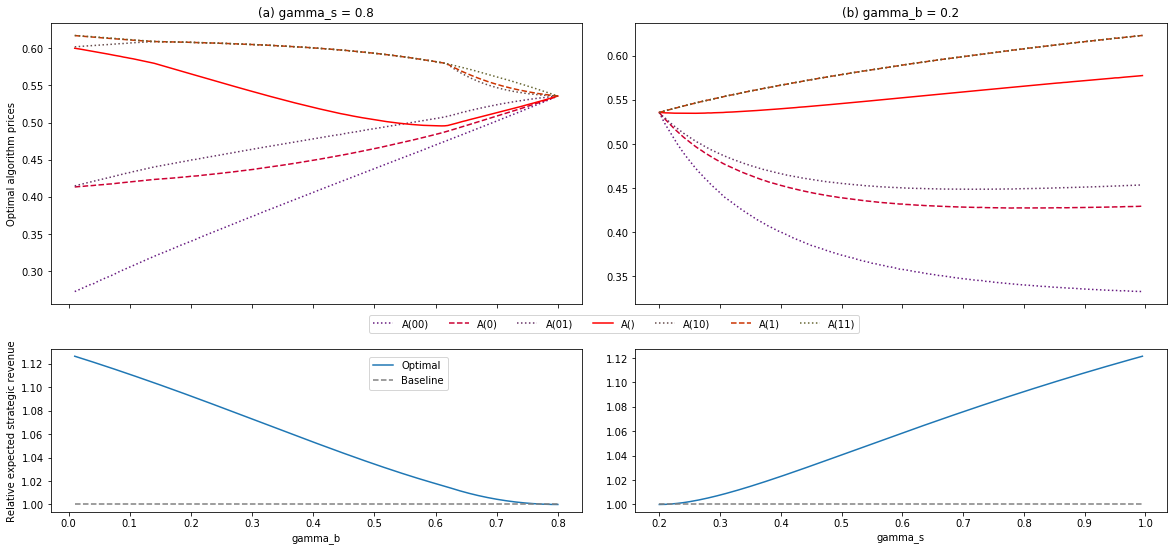

In [10]:
solution = lambda s, b : GlobalSolverMaxN(3, lambda x : beta.cdf(x, 4, 2), lambda x : beta.pdf(x, 4, 2), s, b, False, 3)
constant_revenue_3 = lambda s : (1 + s + s**2) * 0.40964825181031311
parameters_list = ['p_00', 'p_0', 'p_01','p_', 'p_10', 'p_1', 'p_11']
labels = ['A(00)', 'A(0)', 'A(01)', 'A()', 'A(10)', 'A(1)', 'A(11)']
linestyles = [':', '--', ':', '-', ':', '--', ':']
colors = [(0.4, 0.1, 0.5), (0.8, 0.0, 0.2), (0.4, 0.2, 0.4), 'red', (0.4, 0.3, 0.3), (0.8, 0.2, 0.0), (0.4, 0.4, 0.2)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_3, 'T3Beta42.eps', -0.5)